In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import make_pipeline
from src.transformers import CountTransformer, NumericalPCA
from src.transformers import MaxDistanceTransformer, MinDistanceTransformer
from src.transformers import FirstTransformer, LastTransformer, CategorialPCA
from src.transformers import LeftTransformer, RightTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def distance_analyze(data, target, metric):
    neigh = NearestNeighbors(n_neighbors=2, metric = metric)
    nbrs = neigh.fit(data)
    distances, indexes = nbrs.kneighbors(data)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]

    plt.figure(figsize=(6,6))
    plt.plot(distances)

    connect = np.zeros(len(indexes)) 
    for i, (x, y) in enumerate(indexes):
        connect[i] = target[x] == target[y]

    plt.title(f"""
        K-distance Graph {metric}
        Homo: {np.sum(connect)/len(connect)}
        P: {np.percentile(distances, [10, 25, 50, 75, 90])}
    """, fontsize=10)
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)

    plt.show()

   


def plotting(PCAs, target, metrics = ['euclidean']):
    m,n = PCAs.shape

    sns.scatterplot(x=PCAs[:,0], y=PCAs[:,1], hue=target)
    plt.show()
    if n > 2:
        plt.figure (figsize = (7, 6))
        sea_plot = plt.axes(projection='3d')
        sea_plot.scatter3D(PCAs[:,0],PCAs[:,1],PCAs[:,2], c=target, marker='o')
        sea_plot.set_xlabel('PC1')
        sea_plot.set_ylabel('PC2')
        sea_plot.set_zlabel('PC3')
        plt.show()
    
    for m in metrics:
        distance_analyze(PCAs, target, m)

    return 


def save(data, label):
    m, n = data.shape
    _df = pd.DataFrame(data, columns=[f'{label}_PC{i+1}' for i in range(n)])
    _df.to_csv(f'{label}_PCA.csv', index=False)
    

In [3]:
df  = pd.read_csv("train.csv")

target = df['tgt']
sequences = df['src'].apply(json.loads)

min_index = np.min(sequences.apply(min))
max_index = np.max(sequences.apply(max))
min_index, max_index, len(sequences)

(1, 22, 62478)

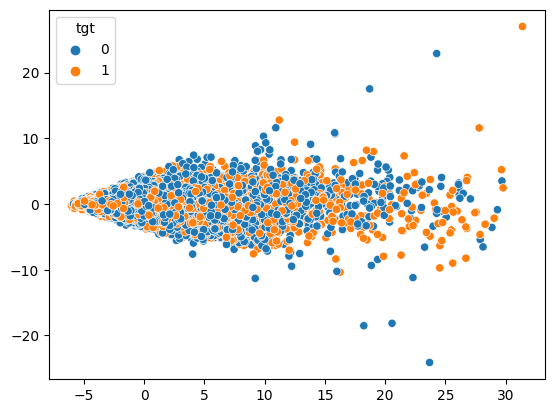

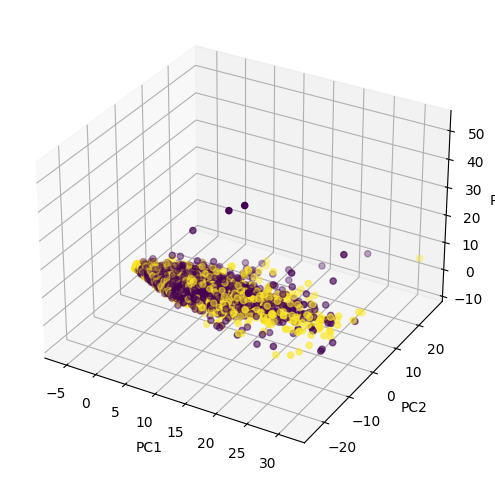

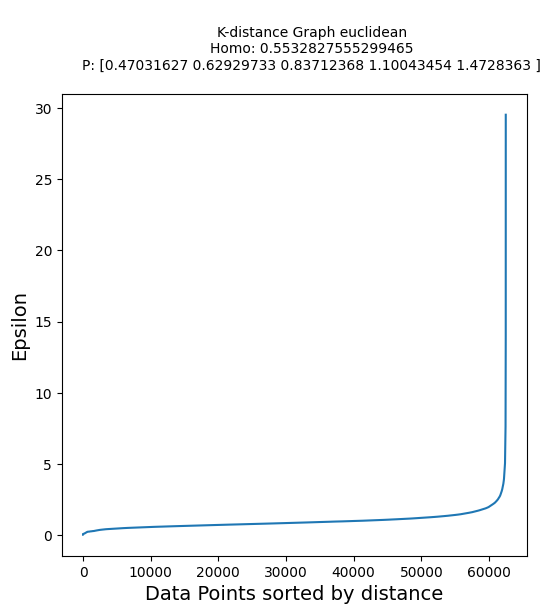

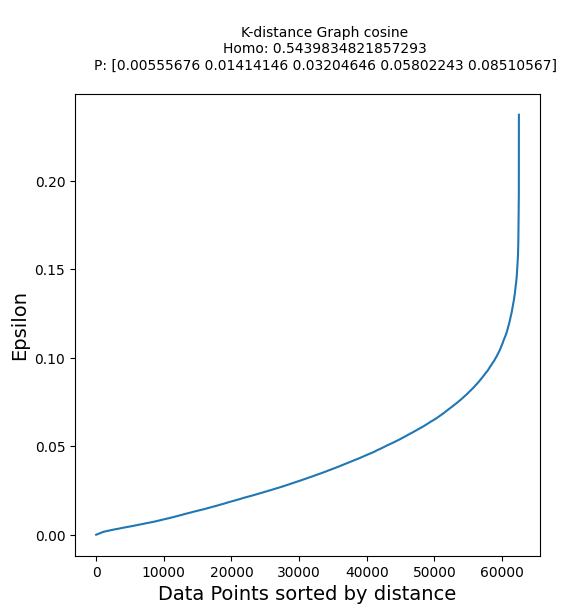

In [4]:
pipeline = make_pipeline(
    CountTransformer(max_index),
    NumericalPCA(.9)
)

data = pipeline.fit_transform(sequences)

plotting(data, target, ['euclidean', 'cosine'])
save(data, 'count')

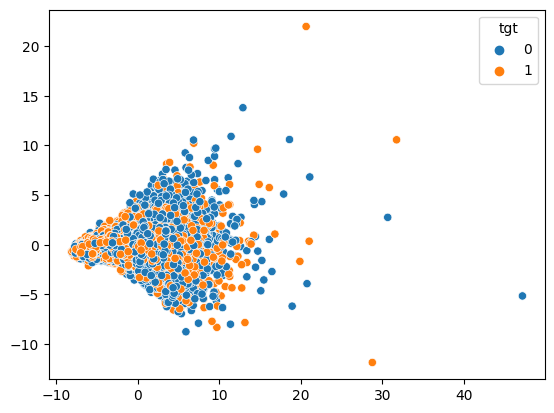

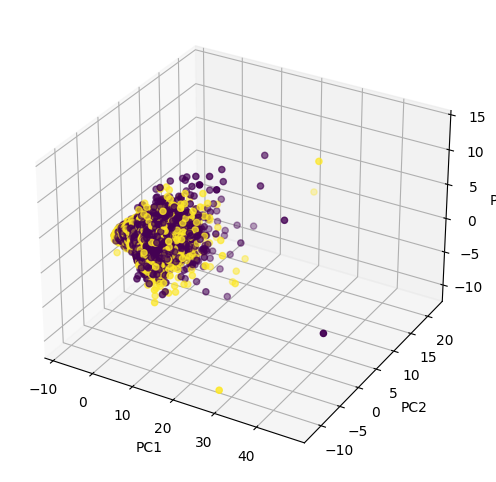

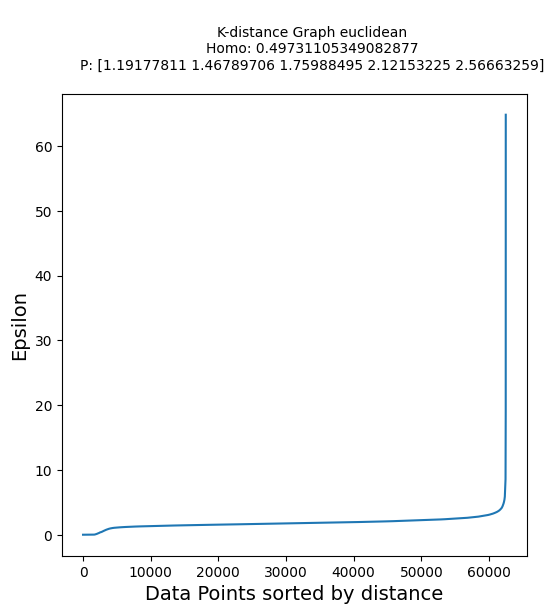

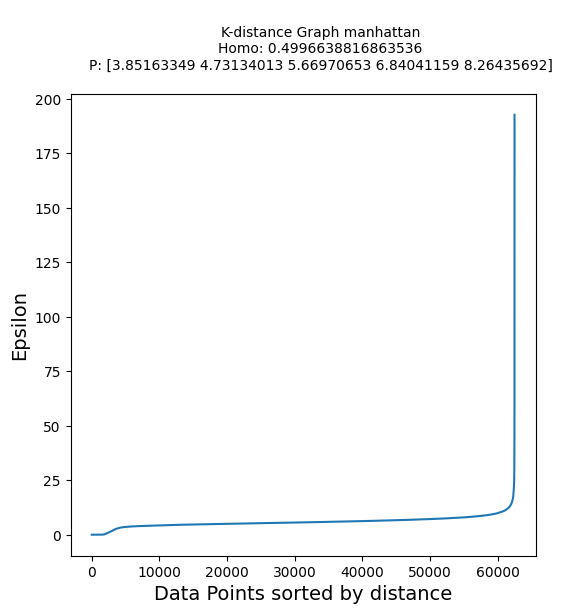

In [5]:
pipeline = make_pipeline(
    MaxDistanceTransformer(max_index),
    NumericalPCA(.9)
)

data = pipeline.fit_transform(sequences)

plotting(data, target, ['euclidean', 'manhattan'])
save(data, 'max_dist')

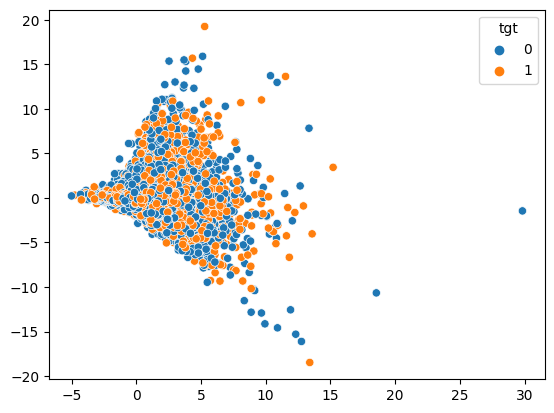

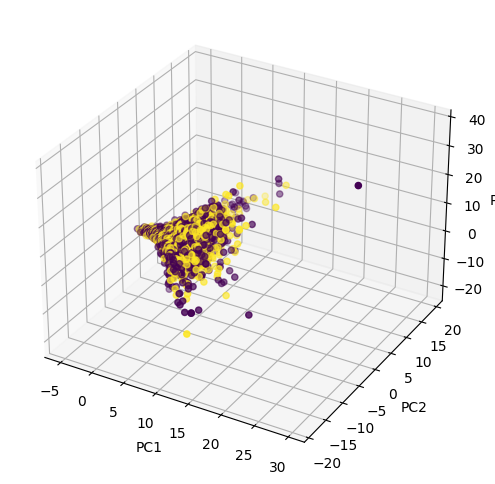

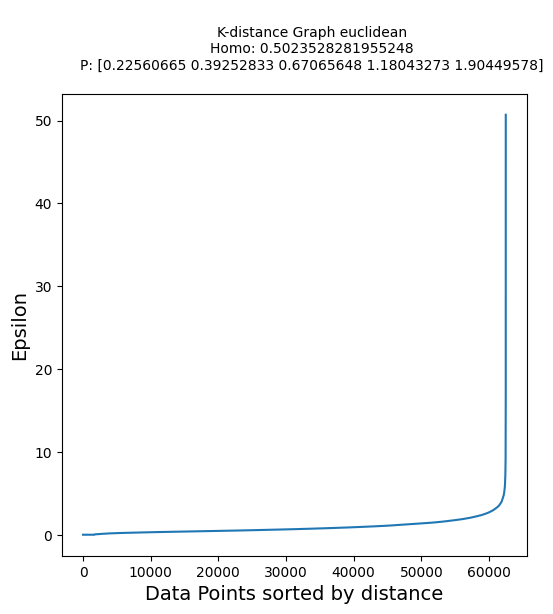

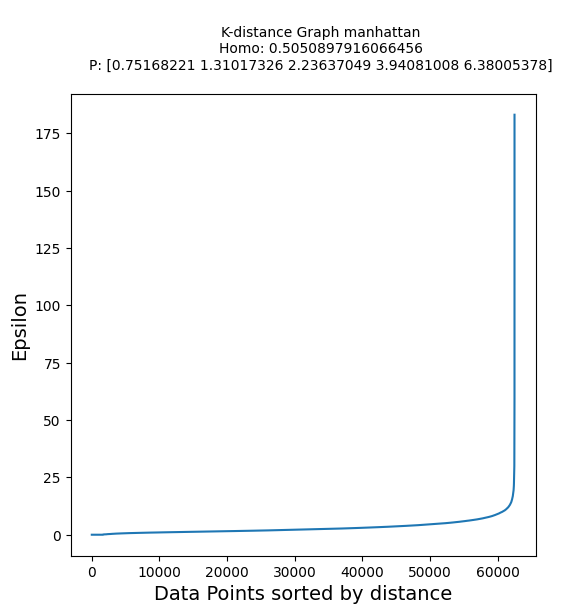

In [6]:
pipeline = make_pipeline(
    MinDistanceTransformer(max_index),
    NumericalPCA(.9)
)

data = pipeline.fit_transform(sequences)

plotting(data, target, ['euclidean', 'manhattan'])
save(data, 'min_dist')

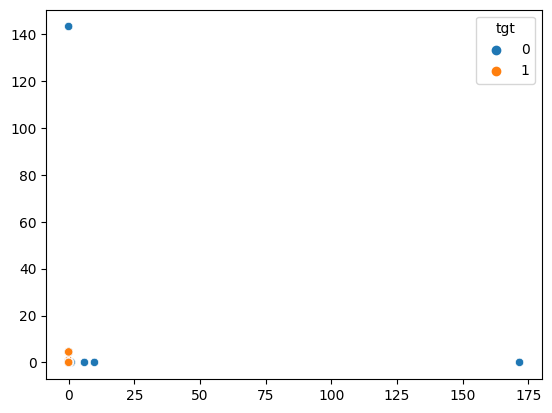

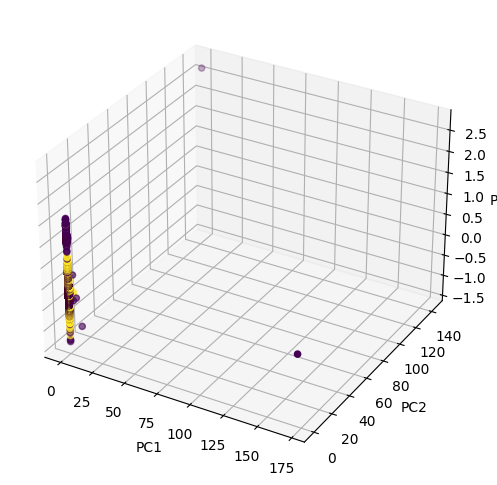

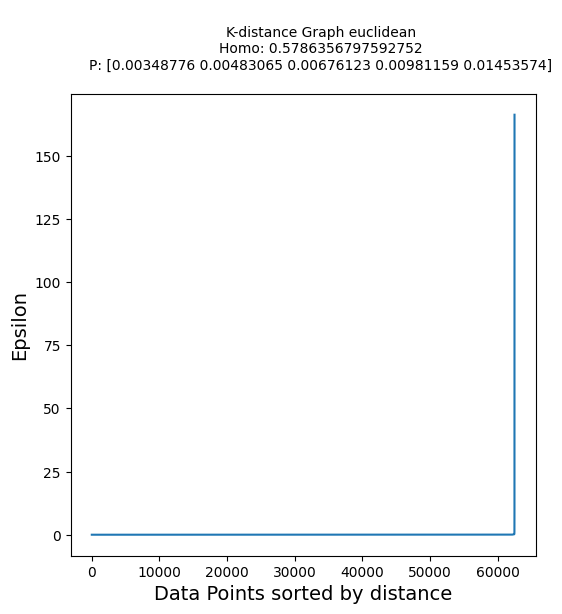

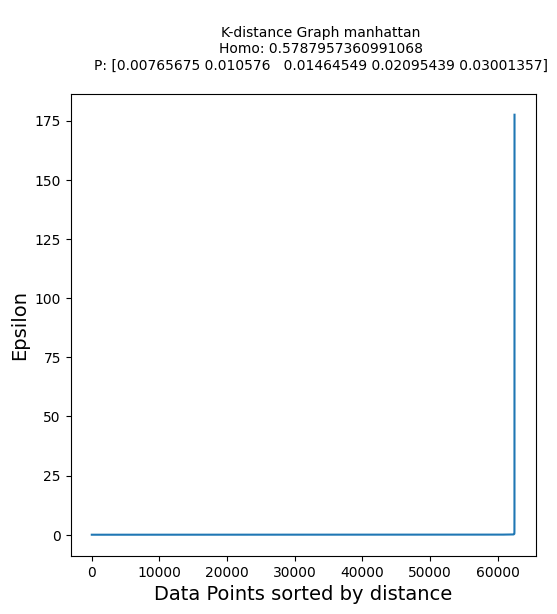

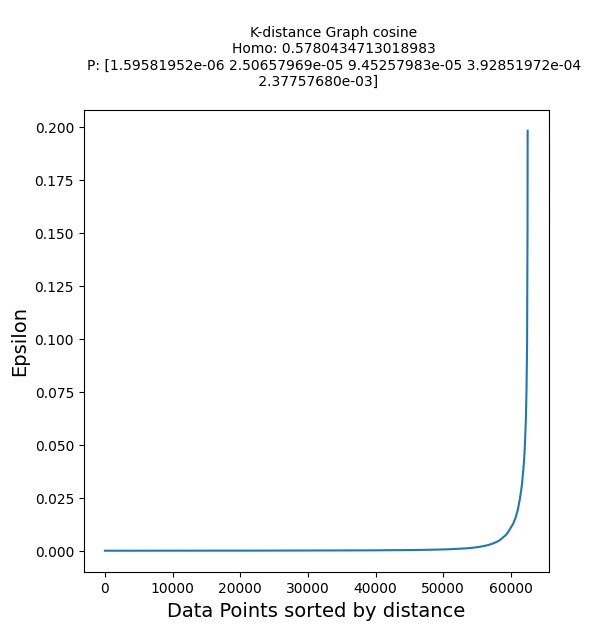

In [7]:
pipeline = make_pipeline(
    FirstTransformer(max_index),
    CategorialPCA()
)

data = pipeline.fit_transform(sequences)
plotting(data, target, ['euclidean', 'manhattan', 'cosine'])
save(data, 'first')

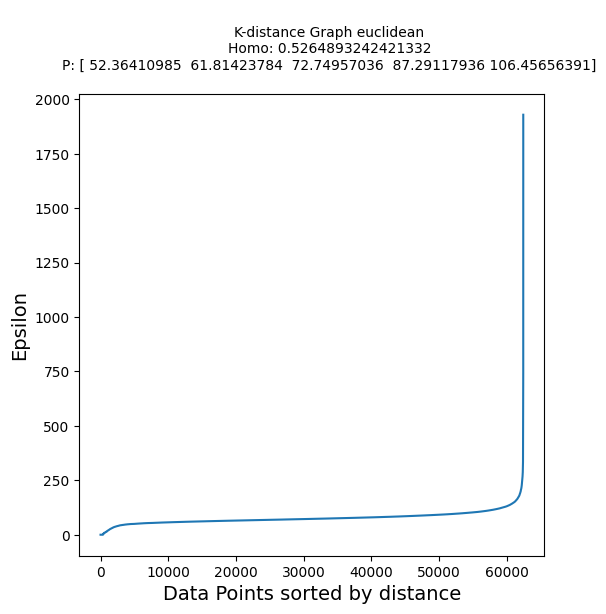

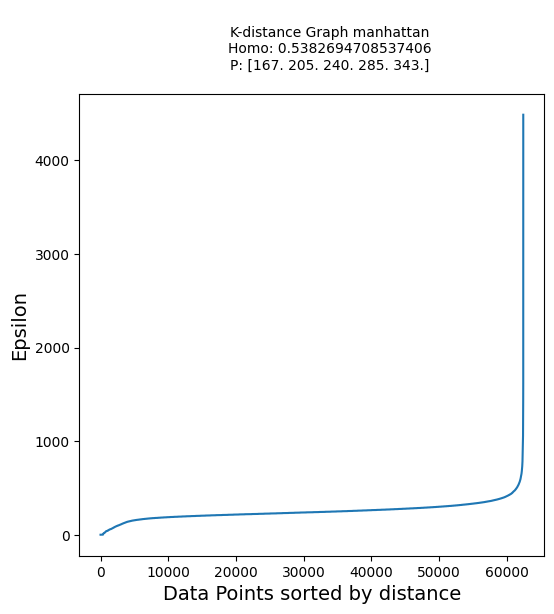

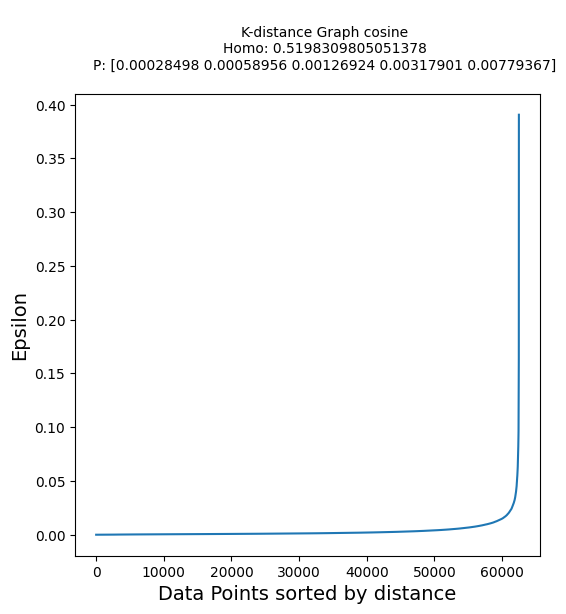

In [8]:
pipeline = make_pipeline(
    LastTransformer(max_index),
)

data = pipeline.fit_transform(sequences)
for m in ['euclidean', 'manhattan', 'cosine']:
    distance_analyze(data.to_numpy(), target, m)
# save(data, 'last')

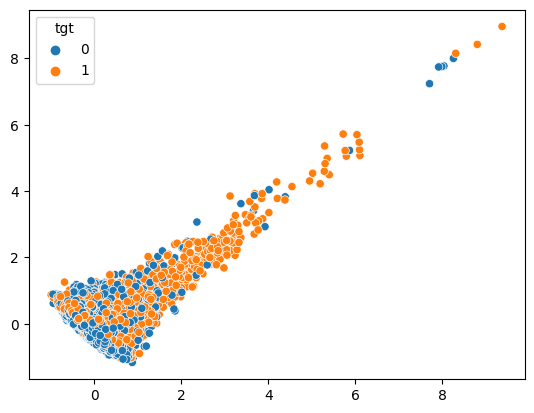

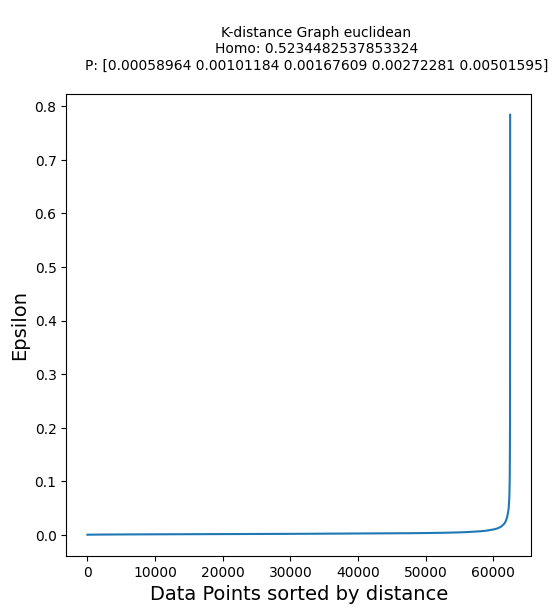

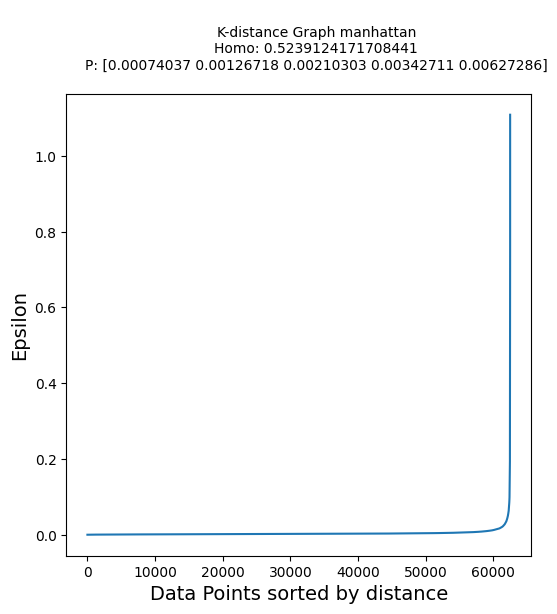

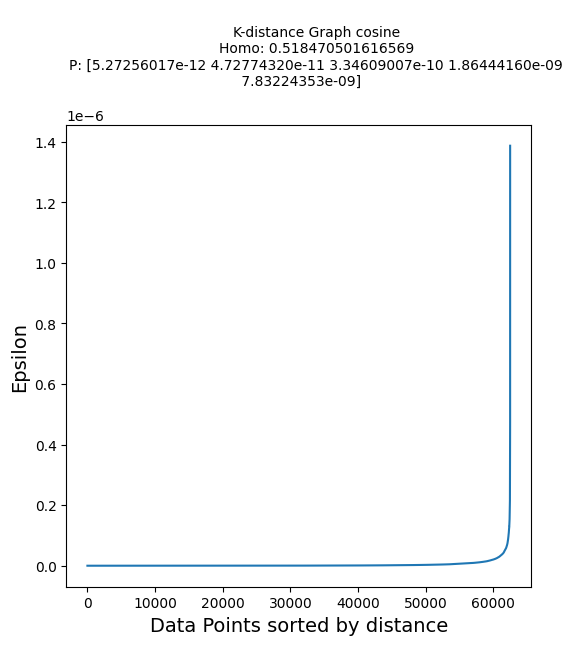

In [8]:
pipeline = make_pipeline(
    LeftTransformer(max_index),
    CategorialPCA()
)

data = pipeline.fit_transform(sequences)
plotting(data, target, ['euclidean', 'manhattan', 'cosine'])
save(data, 'left')

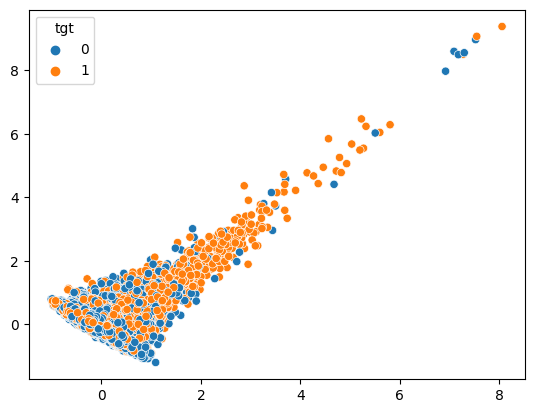

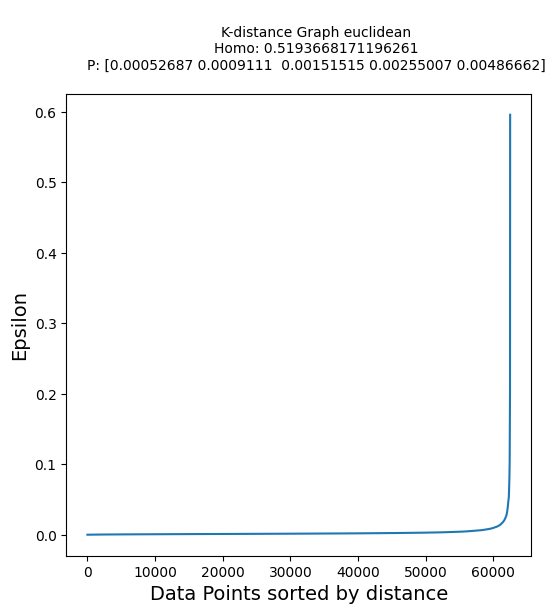

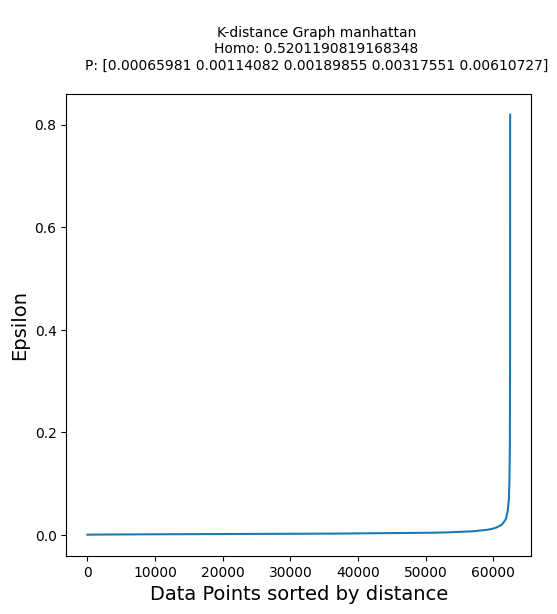

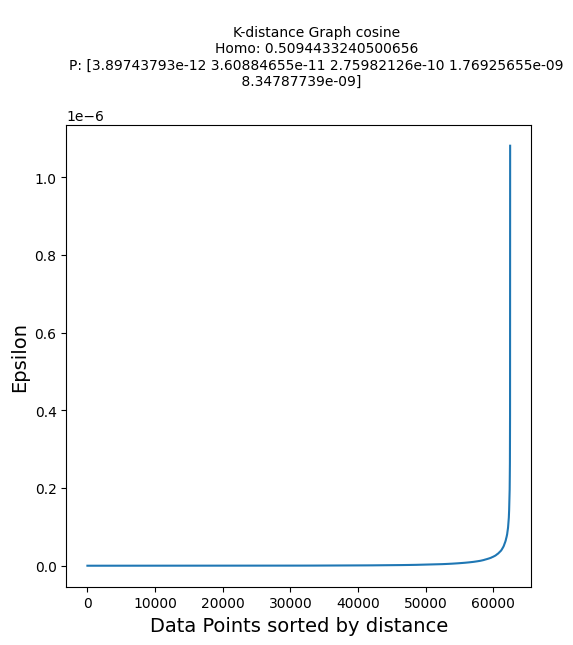

In [10]:
pipeline = make_pipeline(
    RightTransformer(max_index),
    CategorialPCA()
)

data = pipeline.fit_transform(sequences)
plotting(data, target, ['euclidean', 'manhattan', 'cosine'])
save(data, 'right')